In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("insurance.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


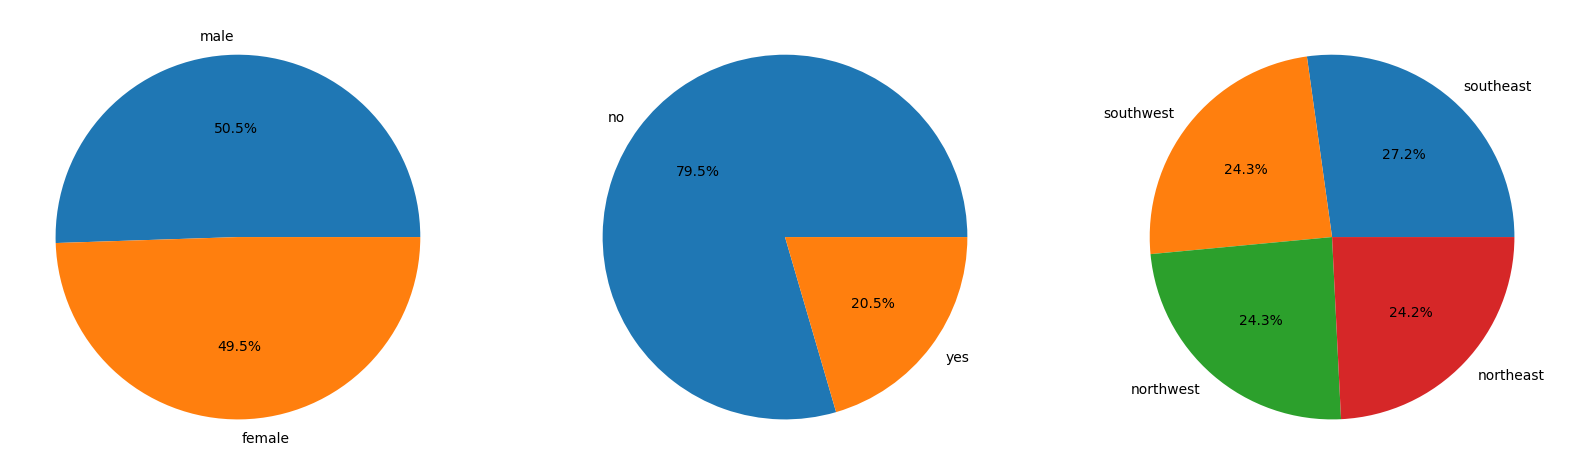

In [8]:
#The below pie chart shows the data is is equally distributed among the sex and the region columns, 
#but in the smoker column, we can observe a ratio of 80:20.
features = ['sex', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = dataset[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

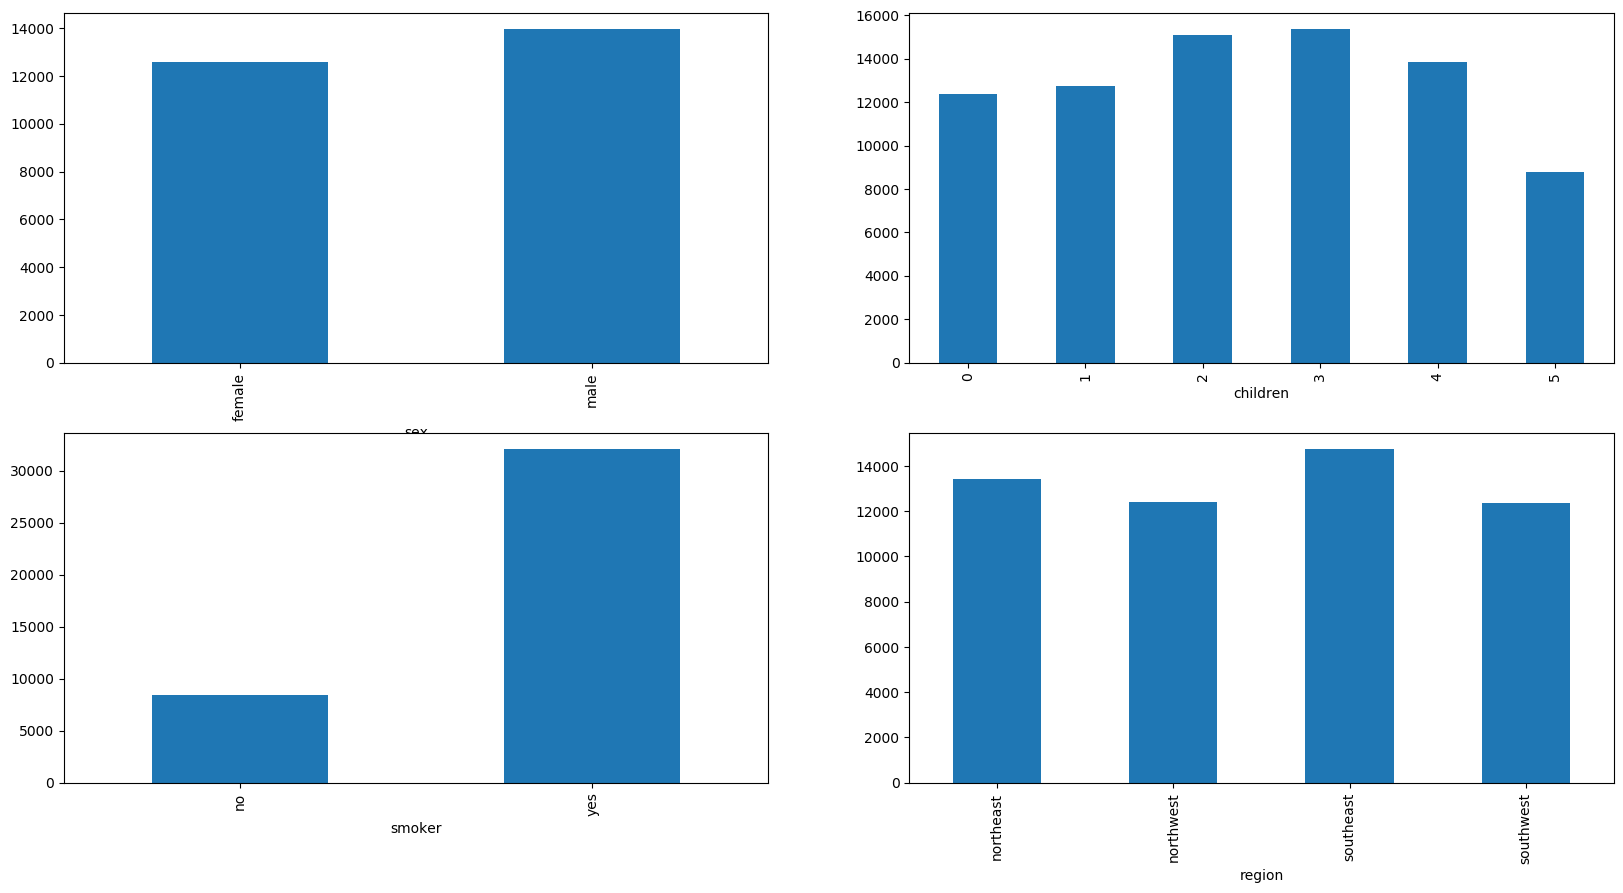

In [9]:
#In the below graph, Charges are high for males as compared to females.
#charges for smokers are on three times higher side compared to non smokers.
#Charges are almost same for all regions.
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    dataset.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

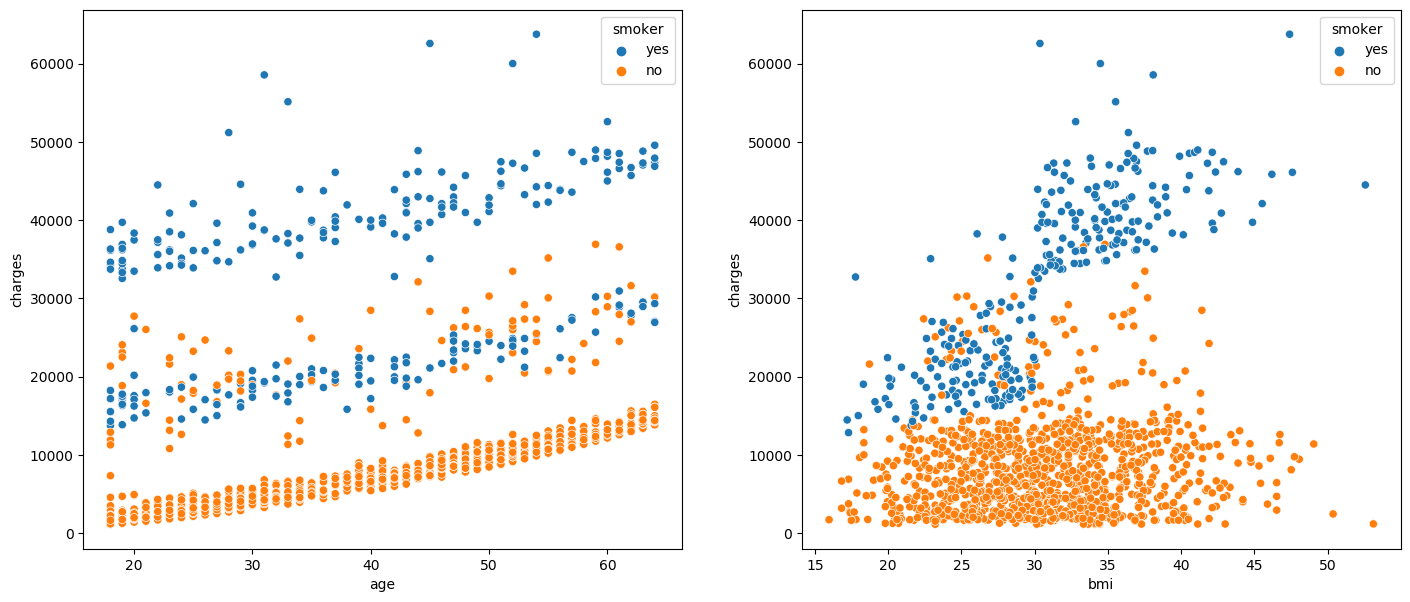

In [10]:
#From the below scatter plot, there is a clear distinction observed the charges smokers have to pay.
#we can also observe that as the age of a person increases premium prices goes up as well.
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=dataset, x=col,
                   y='charges',
                   hue='smoker')
plt.show()


In [11]:
dataset['charges'].median()

9382.033

In [12]:
dataset['charges'].mode()[0]

1639.5631

In [13]:
dataset['bmi'].skew()


0.2840471105987448

In [14]:
dataset['age'].skew()

0.05567251565299186

In [15]:
dataset['charges'].skew()

1.5158796580240388

In [16]:
dataset.cov()

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [17]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [18]:
dataset.corrwith(dataset["charges"])

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
dtype: float64

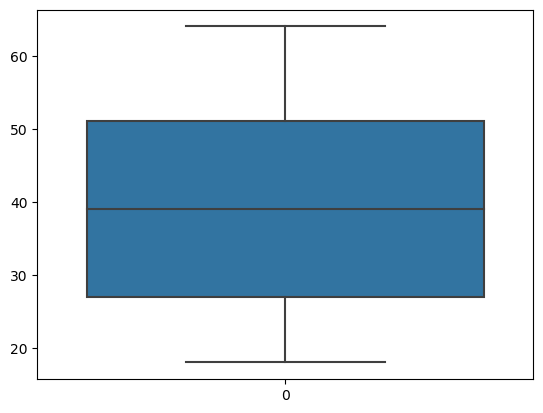

In [19]:
#Here, we are checking for the presence of outliers for age.
#There are no outliers present for age.
dataset.drop_duplicates(inplace=True)
sns.boxplot(dataset['age'])

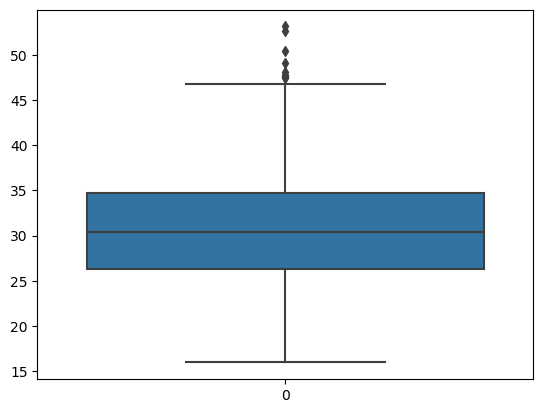

In [20]:
#Here, we are checking for the presence of outliers for bmi.
#There are outliers present for bmi.
sns.boxplot(dataset['bmi'])

In [21]:
#Due to the presence of outliers for bmi column.
#we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.
Q1=dataset['bmi'].quantile(0.25)
Q2=dataset['bmi'].quantile(0.5)
Q3=dataset['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


In [ ]:
#!pip install --user feature_engine

In [22]:
import feature_engine


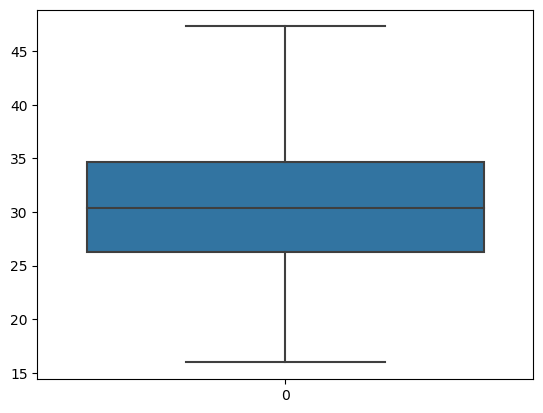

In [23]:

from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
dataset[['bmi']]=arb.fit_transform(dataset[['bmi']])
sns.boxplot(dataset['bmi'])